In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_excel("heart1.xlsx")
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,1.0,0,150,0,2.3,0,0,1,1.0
1,37,1,2,130.0,250.0,0.0,1,187,0,3.5,0,0,2,1.0
2,41,0,1,130.0,204.0,0.0,0,172,0,1.4,2,0,2,1.0
3,56,1,1,120.0,236.0,0.0,1,178,0,0.8,2,0,2,1.0
4,57,0,0,120.0,354.0,0.0,1,163,1,0.6,2,0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,57,0,0,140.0,241.0,0.0,1,123,1,0.2,1,0,3,0.0
302,45,1,3,110.0,264.0,0.0,1,132,0,1.2,1,0,3,0.0
303,68,1,0,144.0,193.0,1.0,1,141,0,3.4,1,2,3,0.0
304,57,1,0,130.0,131.0,0.0,1,115,1,1.2,1,1,3,0.0


Age: Age of the patient
Sex: Sex of the patient
exang: exercise induced angina (1 = yes; 0 = no)
ca: number of major vessels (0-3)
cp: Chest Pain type chest pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps: resting blood pressure (in mm Hg)
chol: cholestoral in mg/dl fetched via BMI sensor
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
rest_ecg: resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
target: 0= less chance of heart attack 1= more chance of heart attack

In [5]:
data.shape

(306, 14)

In [15]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps      float64
chol        float64
fbs         float64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output      float64
dtype: object

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      2
chol        1
fbs         2
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      1
dtype: int64

In [7]:
data=data.dropna()

In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 305
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    float64
dtypes: float64(5), int64(9)
memory usage: 35.5 KB


In [10]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
for i in list(data.columns):
    print("{} -- {}".format(i, data[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


In [49]:
categorical_list = ["sex", "cp","fbs","restecg","exng","slp","caa","thall","output"]


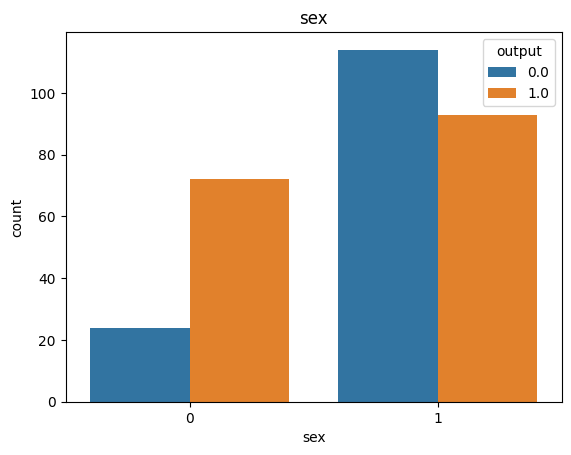

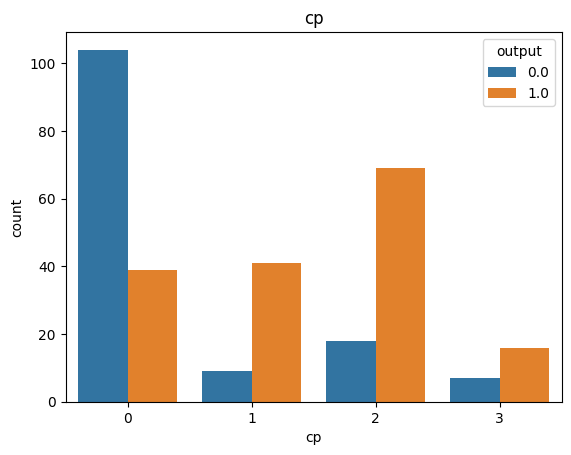

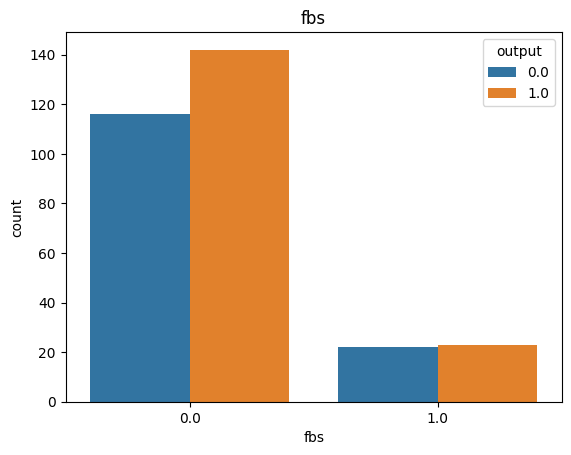

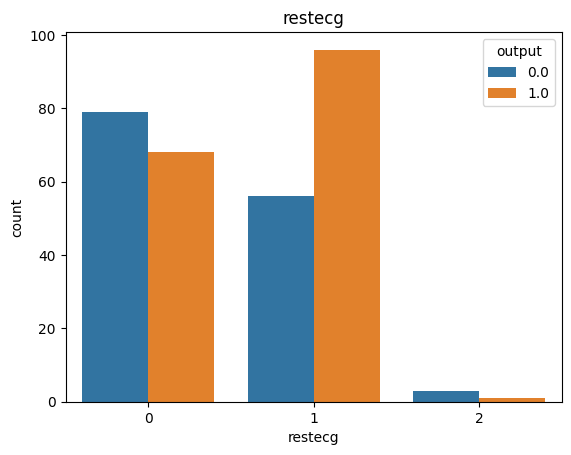

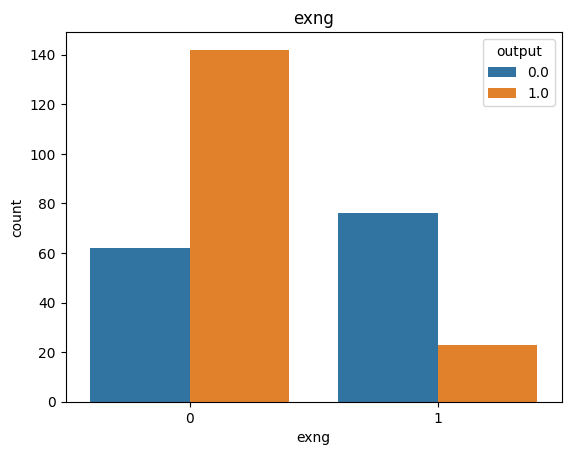

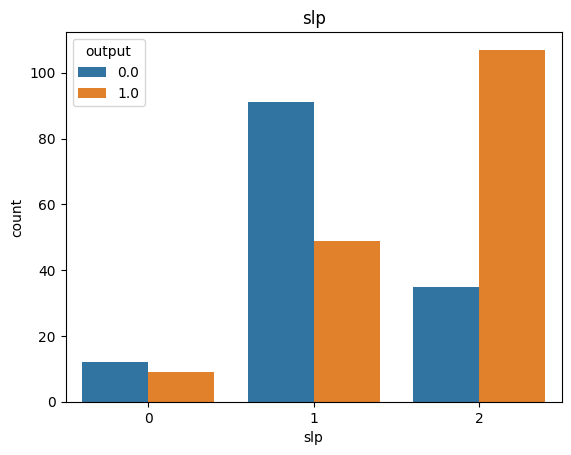

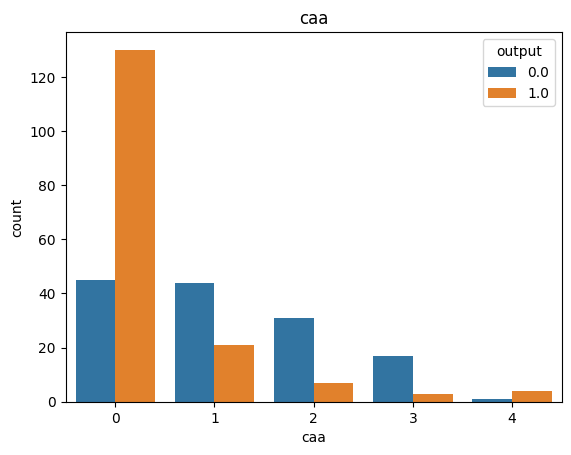

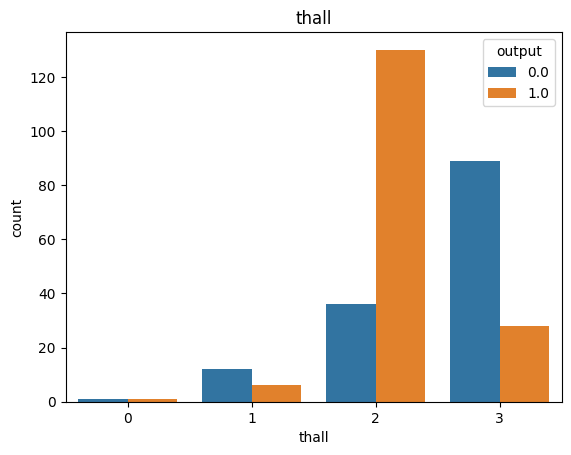

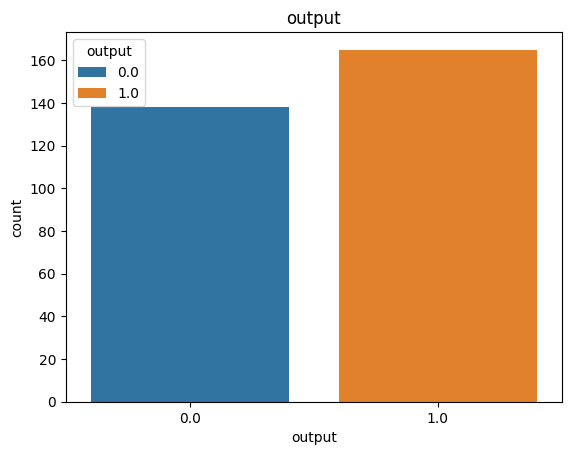

In [50]:
df_categoric = data.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric, hue = "output")
    plt.title(i)

In [51]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak","output"]

Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.

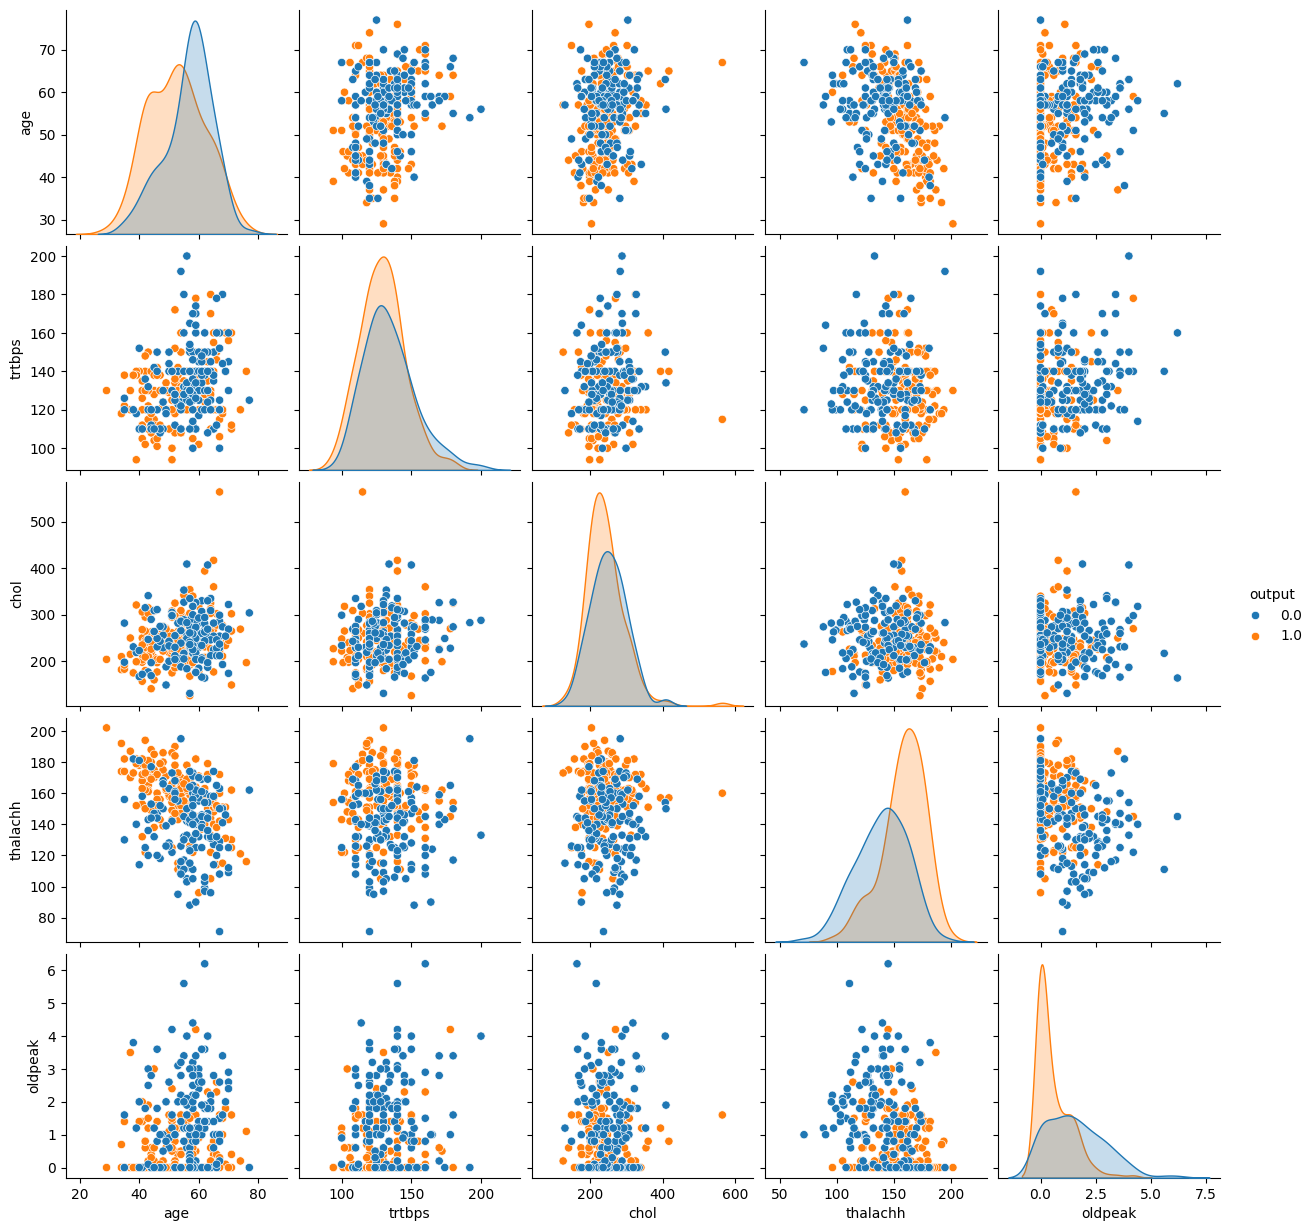

In [52]:
df_numeric = data.loc[:, numeric_list]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.show()

In [ ]:
dark values shows strong realtion between the variable and light color show weak realtion.
corr= +1 indicates perfect positive correlation. corr = –1 indicates perfect negative correlation.
0 means no corelation.


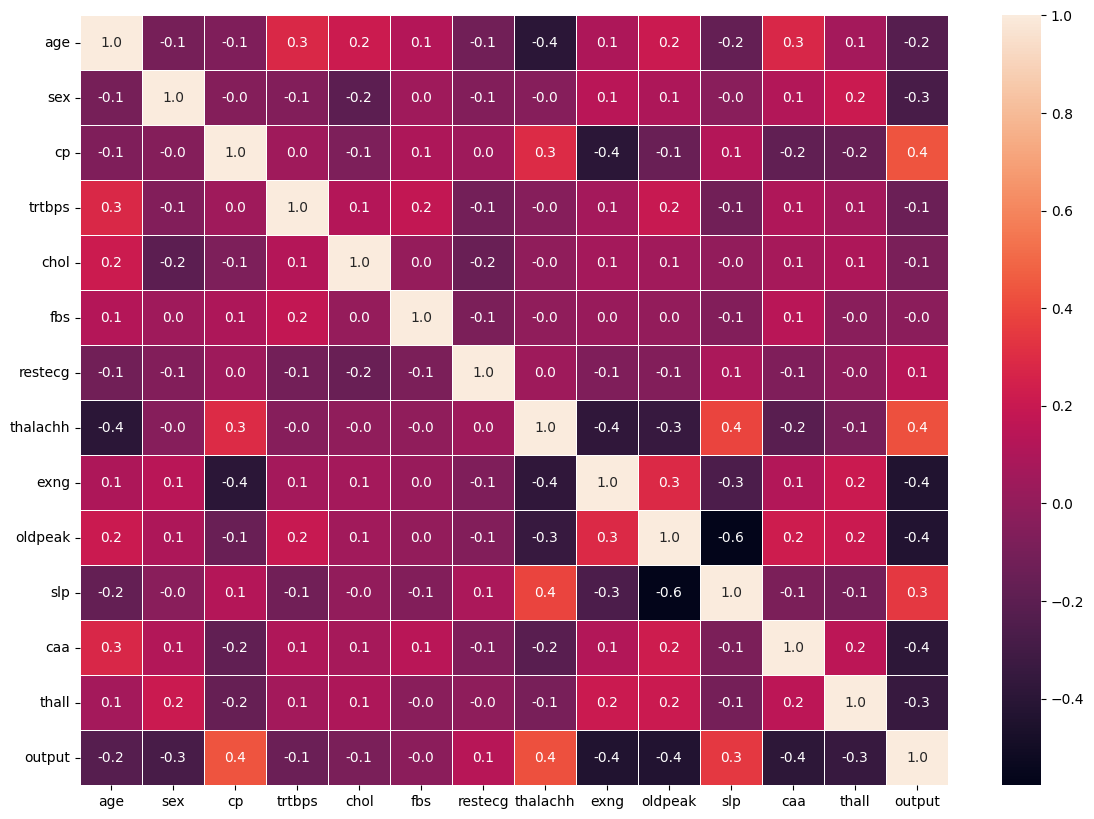

In [53]:
plt.figure(figsize = (14,10))
sns.heatmap(data.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

find good relation between the two variable:
slp and thalachh
thalach and cp
age and trtbps 
age and caa
old peak and exng
so we can use these goood feature into your analaysis for better performance.when we use ml model. it provides good accuracy.


In [59]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak"]
df_numeric = data.loc[:, numeric_list]
df_numeric.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145.0,233.0,150,2.3
1,37,130.0,250.0,187,3.5
2,41,130.0,204.0,172,1.4
3,56,120.0,236.0,178,0.8
4,57,120.0,354.0,163,0.6


In [60]:
#removing outliers
for i in numeric_list:
    
    # IQR
    Q1 = np.percentile(data.loc[:, i],25)
    Q3 = np.percentile(data.loc[:, i],75)
    
    IQR = Q3 - Q1
    
    print("Old shape: ", data.loc[:, i].shape)
      # upper bound
    upper = np.where(data.loc[:, i] >= (Q3 +2.5*IQR))
    
    # lower bound
    lower = np.where(data.loc[:, i] <= (Q1 - 2.5*IQR))
    
    print("{} -- {}".format(upper, lower))
    
    try:
        data.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    
    try:
        data.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))
        
    print("New shape: ", data.shape)

Old shape:  (295,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (295, 14)
Old shape:  (295,)
(array([216, 240], dtype=int64),) -- (array([], dtype=int64),)
KeyError: [216 240] not found in axis
New shape:  (295, 14)
Old shape:  (295,)
(array([83], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (294, 14)
Old shape:  (294,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (294, 14)
Old shape:  (294,)
(array([199, 213], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (292, 14)


C:\Users\Admin\AppData\Local\Temp\ipykernel_2304\2849344548.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(upper[0], inplace = True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2304\2849344548.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(lower[0], inplace = True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2304\2849344548.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(lower[0], inplace 

In [58]:
df1 = data.copy()
df1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,1.0,0,150,0,2.3,0,0,1,1.0
1,37,1,2,130.0,250.0,0.0,1,187,0,3.5,0,0,2,1.0
2,41,0,1,130.0,204.0,0.0,0,172,0,1.4,2,0,2,1.0
3,56,1,1,120.0,236.0,0.0,1,178,0,0.8,2,0,2,1.0
4,57,0,0,120.0,354.0,0.0,1,163,1,0.6,2,0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,57,0,0,140.0,241.0,0.0,1,123,1,0.2,1,0,3,0.0
302,45,1,3,110.0,264.0,0.0,1,132,0,1.2,1,0,3,0.0
303,68,1,0,144.0,193.0,1.0,1,141,0,3.4,1,2,3,0.0
304,57,1,0,130.0,131.0,0.0,1,115,1,1.2,1,1,3,0.0


In [ ]:
From above project we find out which feature are good for predicting heart_attack_analysis.following are the feature 
have good relationship with each other. and with this feature when you build ML model, accuracy of model is also increase.
slp and thalachh 
thalach and cp
age and trtbps 
age and caa
old peak and exng